## LFV Limits from lepton dipole moments

In this notebook, we generate limits on LFV scalars and ALPs for the lepton dipole moments (assuming any and all anomalies have been resolved). For the magnetic dipole moments, we just assume that the current experimental error $\sigma_{a, \rm exp}$ on the dipole moments is valid, and that the contribution from these LFV particles satisfies $|\Delta a_{\rm LFV}| < 2\sigma_{a, \rm exp}$. For the electric dipole moments, since the current measurement is an upper bound $|d|_{\rm max}$ at $2\sigma$, we just assume that $|\Delta d_{\rm LFV}| < |d|_{\rm max}$.

In [1]:
#For numerics
import numpy as np

#For loading and saving data
import pandas as pd

#For plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#For colorblind plots
import seaborn
colors = list(seaborn.color_palette('colorblind').as_hex())

#For TeX plots
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

#For setting root path
import sys
import os

root = os.path.abspath(os.path.join(os.getcwd(), ".."))

if root not in sys.path:
    sys.path.append(root)
    
if os.getcwd() != root:
    os.chdir(root)
    
#Rate functions
from lfv_lepton_observables.limits import magnetic_dipole_moment_limit, electric_dipole_moment_limit, g_2_explanation 
from phys.constants import ml

Extract the relevant form-factor functions:

In [2]:
leptons = ['e', '\\mu', '\\tau']
diagram = [(0, 0), (1, 1), (2, 2)]
diagrams = [(0, 0, 0), (0, 0, 1), (0, 0, 2),
            (1, 1, 0), (1, 1, 1), (1, 1, 2),
            (2, 2, 0), (2, 2, 1), (2, 2, 2)]

def d_label(diagram):
    i, j, k = diagram
    return f'$d_{{{leptons[i]} {leptons[k]}}}~\\textrm{{lim.}}$'

First, a helper function to plot the limits from $g-2$:

In [3]:
def plot_MDM_limit(m, i, idx, ax = None,
                   g = None, th = [[0]*3]*3, d = [[0]*3]*3, ph = [[0]*3]*3, mode = None, ALP = False, Lam = 1000,
                   **plot_kwargs):
    _i, _j = idx
    limit = magnetic_dipole_moment_limit(m, i, (_i, _j), g, th, d, ph, mode, ALP, Lam)
    plt.plot(m, limit, **plot_kwargs)

def plot_MDM_limits(m, i, ax = None, g = None, th = [[0]*3]*3, d = [[0]*3]*3, ph = [[0]*3]*3, ALP = False, Lam = 1000):
    if not ax:
        ax = plt.gca()
    
    particle = 'ALP' if ALP else 'scalar'

    #PC plots
    for j in range(3):
        plot_MDM_limit(m, i, (i, j), ax, g, th, d, ph, 'PC', ALP, Lam, color = colors[j])
        plot_MDM_limit(m, i, (i, j), ax, g, th, d, ph, 'chiral', ALP, Lam, color = colors[j], linestyle = 'dashed')

    minimum = np.min([line.get_ydata() for line in ax.get_lines()], axis = 0)
    ax.fill_between(m, minimum, 1e3, color = 'yellow', alpha = 0.1)

    for j in range(3):
        plt.plot([1], [1e3], color = colors[j],
                 label = f'$C_{{{leptons[i]} {leptons[j]}}}/\\Lambda~\\textrm{{lim.}}$' if ALP else f'$g_{{{leptons[i]} {leptons[j]}}}~\\textrm{{lim.}}$')

    legend = ax.legend(frameon = False,
                       fontsize = 10,
                       loc = 'lower right')
    ax.add_artist(legend)
    
    #This is only for the first plot
    ax.plot([1000], color = 'grey', label = f'$\\textrm{{pure {particle}}}$')
    ax.plot([1000], color = 'grey', label = f'$\\chi\\textrm{{ {particle}}}$', linestyle = 'dashed')

    particle_handles, particle_labels = ax.get_legend_handles_labels()
    particle_handles, particle_labels = particle_handles[-2:], particle_labels[-2:]

    ax.legend(particle_handles, particle_labels,
              frameon = False,
              fontsize = 8,
              loc = 'upper left')

    ax.tick_params(direction = 'in', which = 'both')

    ax.set_xscale('log')
    
    ax.set_xlim(1e0, 1e2 if ALP else 1e3)
    ax.set_xlabel("$m_a~[\\textrm{GeV}]$", fontsize = 14)

    ax.set_yscale('log')
    ymin, ymax =  [1e-1 if ALP else 1e-4, 1e3 if ALP else 1e0]
    ax.set_ylim(ymin, ymax)

    ylabel =f'$C_{{{leptons[i]} \\ell}}/\\Lambda~[{{\\rm TeV}}]^{{-1}}$' if ALP else f'$g_{{{leptons[i]} \\ell}}$'
    ax.set_ylabel(ylabel, fontsize = 14)
    
    return ax

Here, we can look at the limits. First, for scalars:

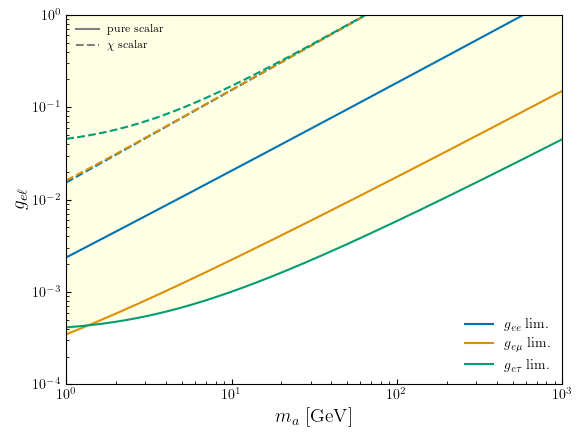

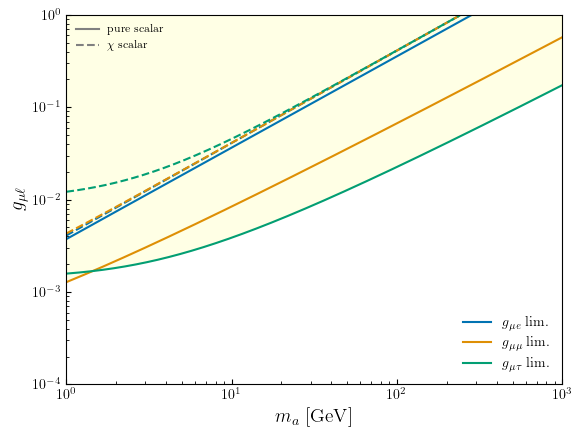

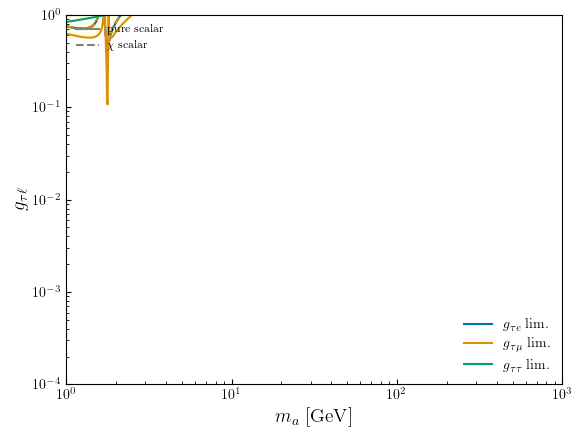

In [4]:
m = np.geomspace(1e0, 1e3, 1000)
for i in range(3):
    ax = plot_MDM_limits(m, i, ALP = False)

    for j in range(3):
        plt.plot([1], [1e3], color = colors[j], label = f'$g_{{{leptons[i]} {leptons[j]}}}~\\textrm{{lim.}}$')

    plt.show()

Now, for ALPs:

/Volumes/T7/Research/Thesis/phys/formulae/ALP_EFT.py:81: RuntimeWarning: divide by zero encountered in scalar divide
  th[i,j] = np.arctan((mf[i]+mf[j])/(mf[i]-mf[j]) / np.tan(TH[i][j]))
/Users/roman/miniconda3/envs/thesis/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/roman/miniconda3/envs/thesis/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/roman/miniconda3/envs/thesis/lib/python3.13/site-packages/numpy/ma/core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


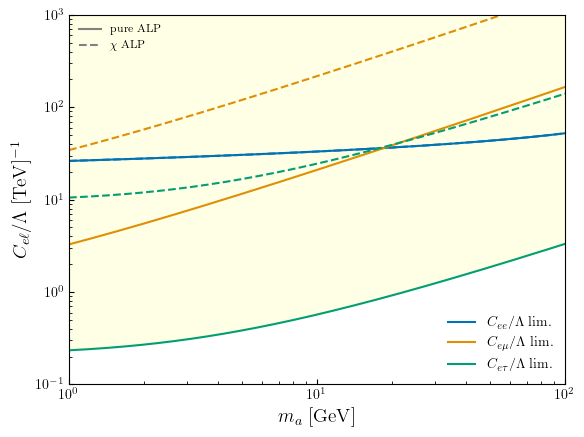

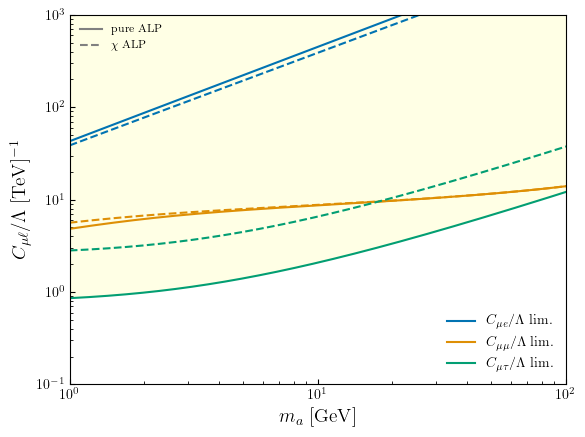

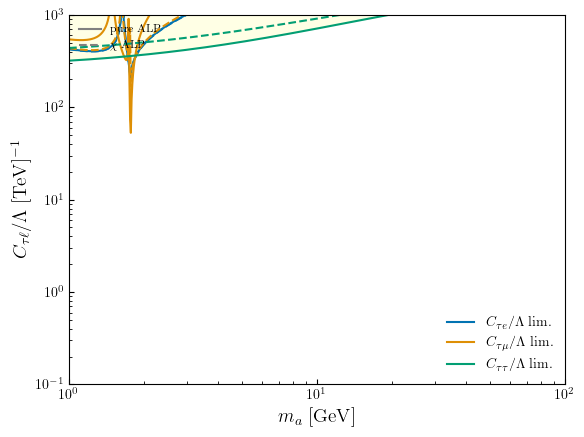

In [5]:
m = np.geomspace(1e0, 1e3, 1000, dtype=np.complex128)
for i in range(3):
    ax = plot_MDM_limits(m, i, ALP = True)

    for j in range(3):
        plt.plot([1], [1e3], color = colors[j], label = f'$C_{{{leptons[i]} {leptons[j]}}}/\\Lambda~\\textrm{{lim.}}$')
        
    plt.show()

We see that the limits from $a_\tau$ are so weak that we opt not to include them. Instead, we generate a figure which shows the limits on LFV scalars and ALPs from the electron and muon dipole moments _assuming_ the anomalies are resolved.

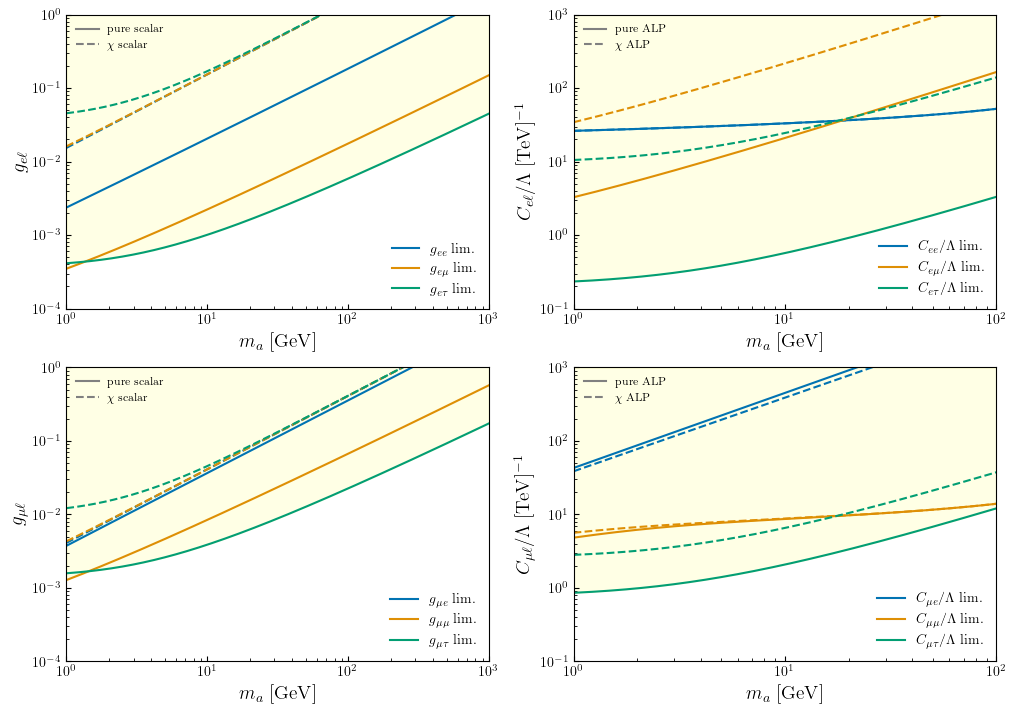

In [6]:
fig = plt.figure(figsize = (12, 8.4))
gs = GridSpec(2, 2, figure = fig, hspace = 0.2, wspace = 0.2)

for i in range(2):
    ax = fig.add_subplot(gs[2*i])
    plot_MDM_limits(m, i, ax = ax)

    ax = fig.add_subplot(gs[2*i+1])
    plot_MDM_limits(m, i, ax = ax, ALP = True)
    
plt.savefig(root + '/figures/chapter3/lfv_mdm_limits.pdf', format = 'pdf', bbox_inches='tight')

Similarly to the magnetic dipole moment, we can compute the limits from the leading bounds on the electric dipole moments of the leptons. These limits only apply when the interaction is CP-violating, so we encode this by indicating the bound is on $g_{ij}\sqrt{\sin{2\theta_{ij}}\cos{\delta_{ij}}}$ for the scalar and $C_{ij}\sqrt{\sin{2\Theta_{ij}}\sin{\Delta_{ij}}}$ for the ALP.

In [7]:
def plot_EDM_limit(m, i, idx, ax = None,
                   g = None, th = [[0]*3]*3, d = [[0]*3]*3, ph = [[0]*3]*3, mode = None, ALP = False, Lam = 1000,
                   **plot_kwargs):
    _i, _j = idx
    limit = electric_dipole_moment_limit(m, i, (_i, _j), g, th, d, ph, mode, ALP, Lam)

    plt.plot(m, limit, **plot_kwargs)

def plot_EDM_limits(m, i, ax = None, g = None, th = [[0]*3]*3, d = [[0]*3]*3, ph = [[0]*3]*3, ALP = False, Lam = 1000):
    if not ax:
        ax = plt.gca()
    
    particle = 'ALP' if ALP else 'scalar'

    #PC plots
    for j in range(3):
        plot_EDM_limit(m, i, (i, j), ax, g, th, d, ph, 'max CPV', ALP, Lam, color = colors[j])

    minimum = np.min([line.get_ydata() for line in ax.get_lines()], axis = 0)
    ax.fill_between(m, minimum, 1e10, color = 'yellow', alpha = 0.1)

    for j in range(3):
        plt.plot([1], [1e3], color = colors[j],
                 label = f'$C_{{{leptons[i]} {leptons[j]}}}/\\Lambda~\\textrm{{lim.}}$' if ALP else f'$g_{{{leptons[i]} {leptons[j]}}}~\\textrm{{lim.}}$')

    ax.legend(frameon = False,
              fontsize = 10,
              loc = 'lower right')

    ax.tick_params(direction = 'in', which = 'both')

    ax.set_xscale('log')
    
    ax.set_xlim(1e0, 1e2 if ALP else 1e3)
    ax.set_xlabel("$m_a~[\\textrm{GeV}]$", fontsize = 14)

    ax.set_yscale('log')
    ymin, ymax =  [1e-4 if ALP else 1e-7, 1e2 if ALP else 1e-1]
    ax.set_ylim(ymin, ymax)
    ALP_label = f'$C_{{{leptons[i]} \\ell}}\\sqrt{{\\sin{{2\\Theta_{{{leptons[i]} \\ell}}}}\\sin{{\\Delta_{{{leptons[i]} \\ell}}}}}}/\\Lambda~[{{\\rm TeV}}]^{{-1}}$'
    scalar_label = f'$g_{{{leptons[i]} \\ell}}\\sqrt{{\\sin{{2\\theta_{{{leptons[i]} \\ell}}}}\\cos{{\\delta_{{{leptons[i]} \\ell}}}}}}$'
    ylabel =ALP_label if ALP else scalar_label
    ax.set_ylabel(ylabel, fontsize = 14)
    
    return ax

Now we can look at the limits for the scalar:

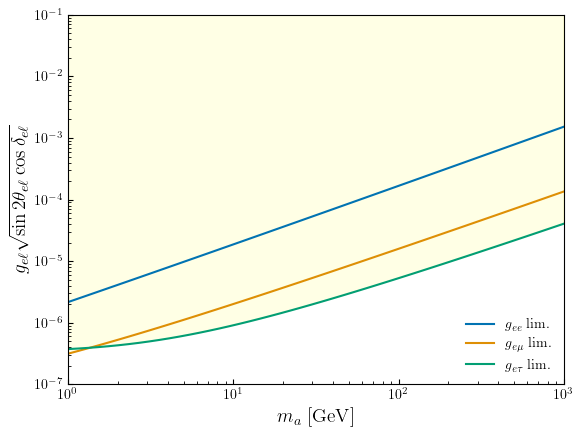

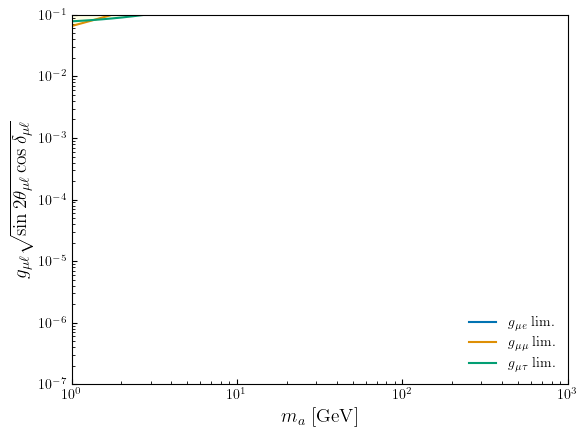

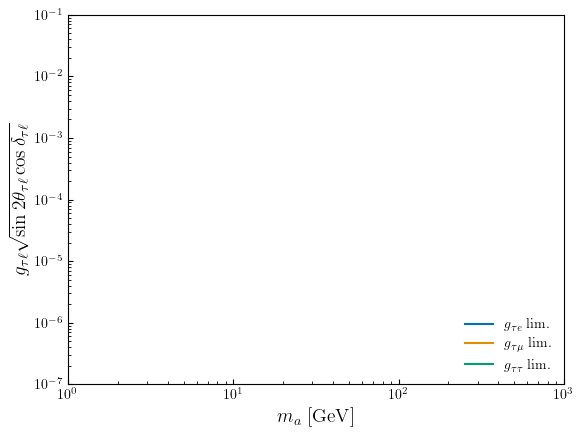

In [8]:
m = np.geomspace(1e0, 1e3, dtype = np.complex128)
for i in range(3):
    plot_EDM_limits(m, i)
    plt.show()

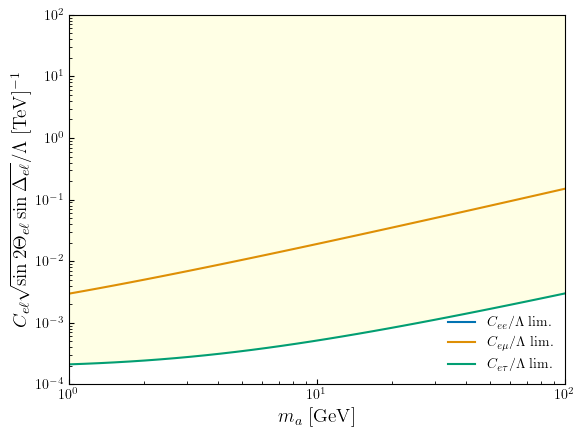

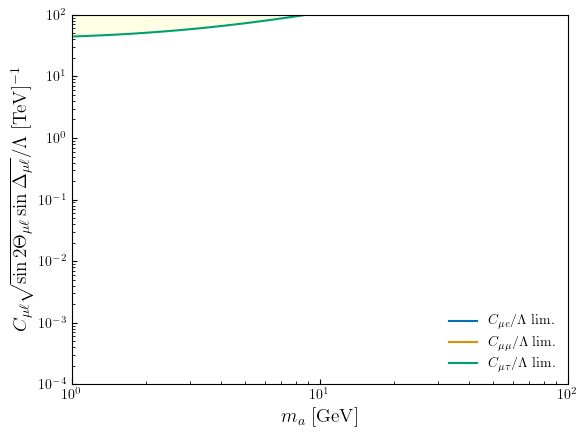

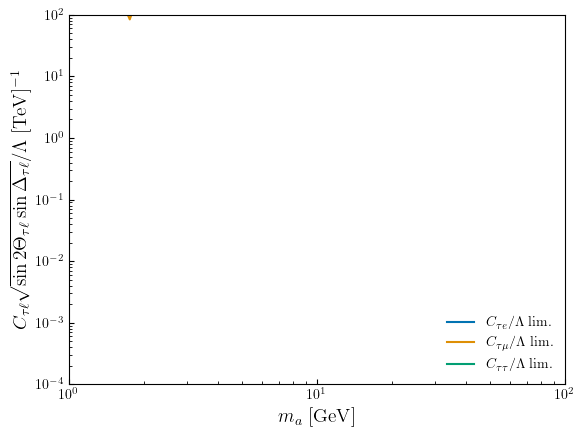

In [9]:
m = np.geomspace(1e0, 1e3, dtype = np.complex128)
for i in range(3):
    plot_EDM_limits(m, i, ALP = True)
    plt.show()

In this case, we see that the limits placed from the electric dipole moment are only potentially stronger from the electron EDM, so we generate a figure which includes that:

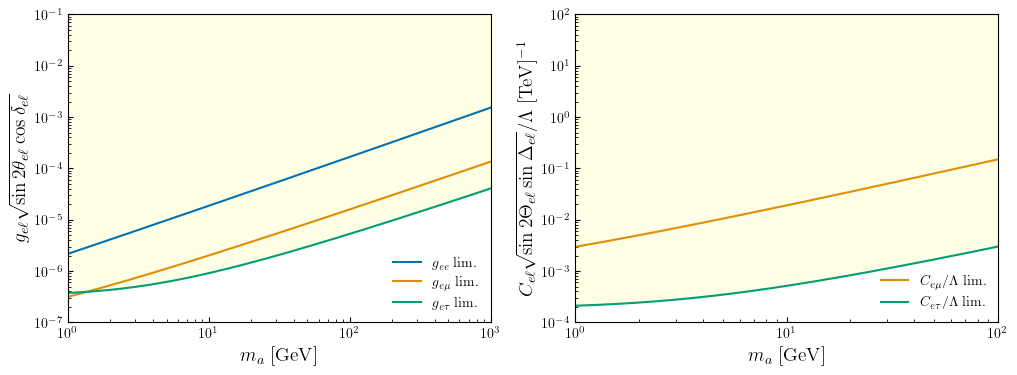

In [10]:
m = np.geomspace(1, 1e3, 1000)

fig = plt.figure(figsize = (12, 4))
gs = GridSpec(1, 2, figure = fig, wspace = 0.2)

ax = fig.add_subplot(gs[0])
plot_EDM_limits(m, 0, ax = ax)

ax = fig.add_subplot(gs[1])
plot_EDM_limits(m, 0, ax = ax, ALP = True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], labels[1:], frameon = False, loc = 'lower right')

plt.savefig(root + '/figures/chapter3/lfv_edm_limits.pdf', format = 'pdf', bbox_inches='tight')

Now $g-2$ explanations...

In [11]:
from phys.formulae.ALP_EFT import ALP_to_scalar, scalar_to_ALP

def ALP_angles(idx, plot_th, g = None):

    _i, _j = idx
    if g == None:
        g = np.zeros((3, 3))
        g[_i][_j] = 1
        g[_j][_i] = 1
    
    ALP_th = []
    for th in plot_th:
        _, angle, _, _ = scalar_to_ALP(g, th * np.ones((3, 3)), d = np.zeros((3, 3)), ph = np.zeros((3, 3)), Lam = 1000)
        ALP_th.append(angle[_i][_j])
    return ALP_th

def scalar_angles(idx, plot_th, g = None):

    _i, _j = idx
    if g == None:
        g = np.zeros((3, 3))
        g[_i][_j] = 1
        g[_j][_i] = 1
    
    scalar_th = []
    for th in plot_th:
        _, angle, _, _ = ALP_to_scalar(g, th * np.ones((3, 3)), D = np.zeros((3, 3)), PH = np.zeros((3, 3)), Lam = 1000)
        scalar_th.append(angle[_i][_j])
    return scalar_th

/Volumes/T7/Research/Thesis/phys/formulae/ALP_EFT.py:105: RuntimeWarning: invalid value encountered in scalar divide
  C[i][j] = g[i][j] * np.sqrt(mf[i]**2 + mf[j]**2 + 2*mf[i]*mf[j]*np.cos(2*th[i][j])) * Lam/np.abs(mf[i]**2 - mf[j]**2)
/Volumes/T7/Research/Thesis/phys/formulae/ALP_EFT.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  TH[i][j] = np.arctan((mf[i]+mf[j])/(mf[i]-mf[j]) / np.tan(th[i][j]))
/Volumes/T7/Research/Thesis/phys/formulae/ALP_EFT.py:81: RuntimeWarning: divide by zero encountered in scalar divide
  th[i,j] = np.arctan((mf[i]+mf[j])/(mf[i]-mf[j]) / np.tan(TH[i][j]))
/Users/roman/miniconda3/envs/thesis/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/roman/miniconda3/envs/thesis/lib/python3.13/site-packages/numpy/ma/core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype

\Theta/\pi: [np.float64(-0.5), np.float64(-0.252591884487744), np.float64(-0.25009189624142425)]
\Theta/(\pi/4): [np.float64(-2.0), np.float64(-1.010367537950976), np.float64(-1.000367584965697)]
\theta/\pi: [np.float64(-0.5), np.float64(-0.2600917132426473), np.float64(-0.25009189624142425)]
\theta/(\pi/4): [np.float64(-2.0), np.float64(-1.0403668529705892), np.float64(-1.000367584965697)]


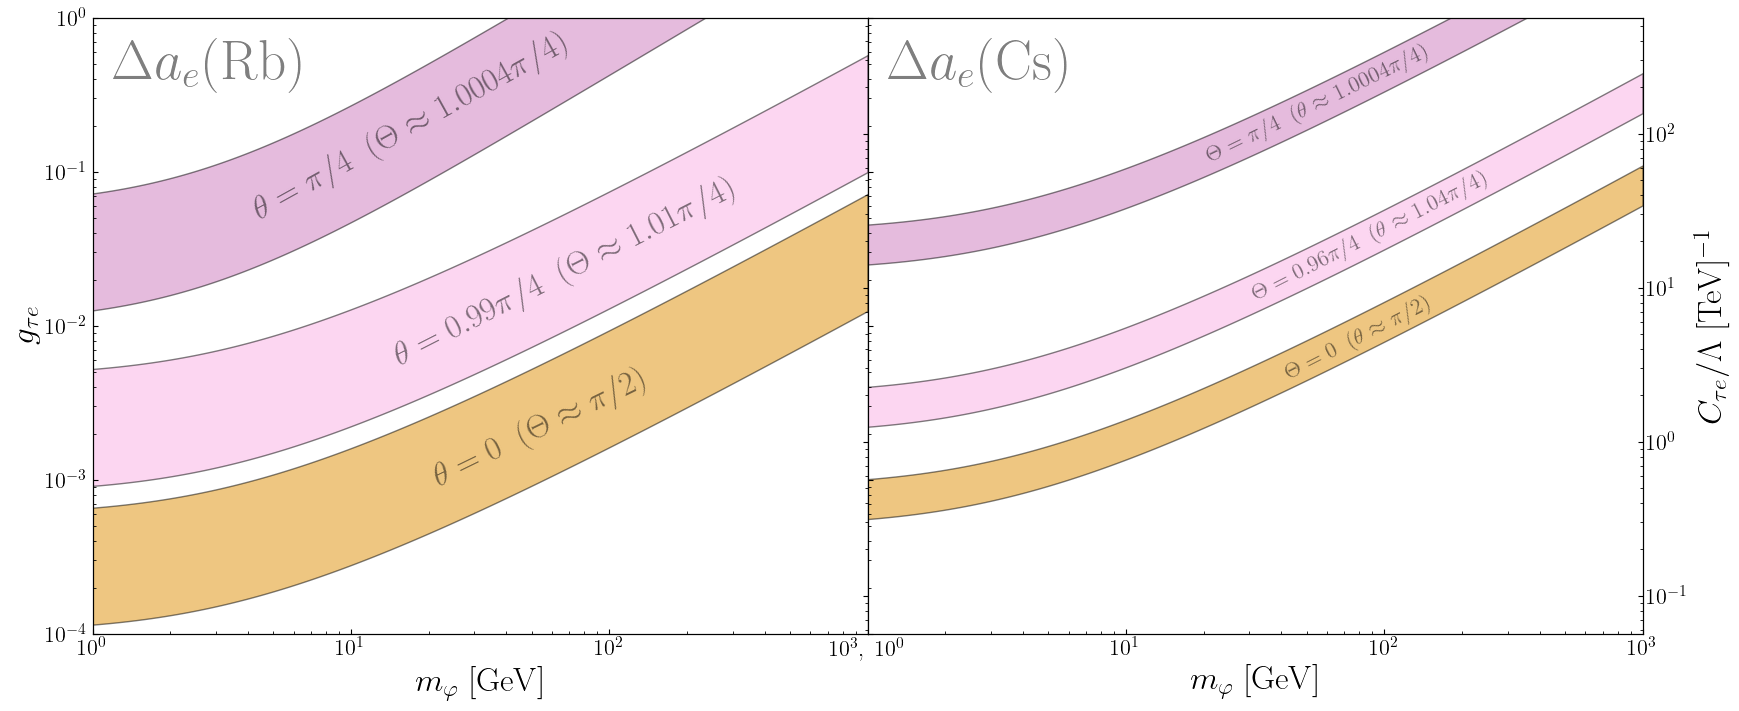

In [12]:

m = np.geomspace(1, 1e3, 1000, dtype = np.complex128)

fig = plt.figure(figsize = (20, 8))

gs = GridSpec(1, 2, wspace = 0)

ax_Rb = fig.add_subplot(gs[0])

ALP_ax_Rb = ax_Rb.twinx()

plot_th = [0, 0.99*np.pi/4, np.pi/4]

ALP_th = ALP_angles((0, 2), plot_th)

print('\\Theta/\\pi:',[th/np.pi for th in ALP_th])
print('\\Theta/(\\pi/4):', [th/(np.pi/4) for th in ALP_th])

ax_Rb.fill_between(m, *g_2_explanation(m, 'e Rb', (0, 2), th = plot_th[0] * np.ones((3, 3))),
                   color = colors[1], edgecolor = 'black', alpha = 0.5)
ax_Rb.fill_between(m, *g_2_explanation(m, 'e Rb', (0, 2), th = plot_th[1] * np.ones((3, 3))),
                   color = colors[6], edgecolor = 'black', alpha = 0.5)
ax_Rb.fill_between(m, *g_2_explanation(m, 'e Rb', (0, 2), th = plot_th[2] * np.ones((3, 3))),
                   color = colors[4], edgecolor = 'black', alpha = 0.5)

ax_Rb.set_xscale('log')
ax_Rb.set_xlim(1e0, 1e3)
ax_Rb.set_xticks([1e0, 1e1, 1e2, 1e3], ['$10^0$', '$10^1$', '$10^2$', '$10^3,~10^0$'])
ax_Rb.tick_params(axis = 'x', labelsize = 16)
ax_Rb.set_xlabel('$m_{\\varphi}~[{\\rm GeV}]$', fontsize = 24)

ax_Rb.set_yscale('log')
ax_Rb.set_ylim(1e-4, 1e0)
ax_Rb.set_ylabel('$g_{\\tau e}$', fontsize = 24)

ax_Rb.tick_params(which = 'both', direction = 'in')

ymin, ymax = ax_Rb.get_ylim()
Lam = 1000
ALP_factor = Lam/ml[2]
ALP_ax_Rb.set_ylim(ALP_factor * ymin, ALP_factor * ymax)
ALP_ax_Rb.set_yscale('log')
ax_Rb.tick_params(axis = 'y', labelsize = 16)

ALP_ax_Rb.tick_params(which = 'both', direction = 'in')

ax_Cs = fig.add_subplot(gs[1])

plot_th = [0, 0.96*np.pi/4, np.pi/4]
scalar_th = scalar_angles((0, 2), plot_th)

print('\\theta/\\pi:', [th/(np.pi) for th in scalar_th])
print('\\theta/(\\pi/4):', [th/(np.pi/4) for th in scalar_th])
ALP_ax_Cs = ax_Cs.twinx()

ax_Cs.fill_between(m, *g_2_explanation(m, 'e Cs', (0, 2), th = scalar_th[0] * np.ones((3, 3))),
                   color = colors[1], edgecolor = 'black', alpha = 0.5)
ax_Cs.fill_between(m, *g_2_explanation(m, 'e Cs', (0, 2), th = scalar_th[1] * np.ones((3, 3))),
                   color = colors[6], edgecolor = 'black', alpha = 0.5)
ax_Cs.fill_between(m, *g_2_explanation(m, 'e Cs', (0, 2), th = scalar_th[2] * np.ones((3, 3))),
                   color = colors[4], edgecolor = 'black', alpha = 0.5)

ax_Cs.set_xscale('log')
ax_Cs.set_xlim(1e0, 1e3)
ax_Cs.set_xticks([1e1, 1e2, 1e3])
ax_Cs.tick_params(axis = 'x', labelsize = 16)
ax_Cs.set_xlabel('$m_{\\varphi}~[{\\rm GeV}]$', fontsize = 24)

ax_Cs.set_yscale('log')
ax_Cs.set_ylim(1e-4, 1e0)

ax_Cs.tick_params(which = 'both', direction = 'in')

ymin, ymax = ax_Rb.get_ylim()
Lam = 1000
ALP_factor = Lam/ml[2]
ALP_ax_Cs.set_ylim(ALP_factor * ymin, ALP_factor * ymax)
ALP_ax_Cs.set_yscale('log')
ALP_ax_Cs.set_ylabel('$C_{\\tau e}/\\Lambda~[{\\rm TeV}]^{-1}$', fontsize = 24)
ALP_ax_Cs.tick_params(axis = 'y', labelsize = 16)
ALP_ax_Cs.tick_params(which = 'both', direction = 'in')


ax_Rb.text(4, 5e-2, '$\\theta = \\pi/4~~(\\Theta \\approx 1.0004\\pi/4)$',
           rotation = 29, fontsize = 24, alpha = 0.5)
ax_Rb.text(14, 5.6e-3, '$\\theta = 0.99\\pi/4~~(\\Theta \\approx 1.01\\pi/4)$',
           rotation = 27, fontsize = 24, alpha = 0.5)
ax_Rb.text(20, 9.2e-4, '$\\theta = 0~~(\\Theta \\approx \\pi/2)$',
           rotation = 26, fontsize = 24, alpha = 0.5)

ax_Rb.text(1.2e0, 4e-1, '$\\Delta a_{e}({\\rm Rb})$', fontsize = 40, alpha = 0.5)
ax_Cs.text(1.2e0, 4e-1, '$\\Delta a_{e}({\\rm Cs})$', fontsize = 40, alpha = 0.5)

ax_Cs.text(20, 1.15e-1, '$\\Theta = \\pi/4~~(\\theta \\approx 1.0004\\pi/4)$',
           rotation = 26, fontsize = 16, alpha = 0.5)
ax_Cs.text(30, 1.47e-2, '$\\Theta = 0.96\\pi/4~~(\\theta \\approx 1.04\\pi/4)$',
           rotation = 27, fontsize = 16, alpha = 0.5)
ax_Cs.text(40, 4.5e-3, '$\\Theta = 0~~(\\theta \\approx \\pi/2)$',
           rotation = 27, fontsize = 16, alpha = 0.5)

ax_Rb.tick_params(labelright = False)
ax_Cs.tick_params(labelleft = False)

plt.savefig('figures/chapter3/scalar_ALP_electron_g_2.pdf', format = 'pdf', bbox_inches='tight')

/Volumes/T7/Research/Thesis/phys/formulae/ALP_EFT.py:105: RuntimeWarning: invalid value encountered in scalar divide
  C[i][j] = g[i][j] * np.sqrt(mf[i]**2 + mf[j]**2 + 2*mf[i]*mf[j]*np.cos(2*th[i][j])) * Lam/np.abs(mf[i]**2 - mf[j]**2)
/Volumes/T7/Research/Thesis/phys/formulae/ALP_EFT.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  TH[i][j] = np.arctan((mf[i]+mf[j])/(mf[i]-mf[j]) / np.tan(th[i][j]))


\Theta/\pi: [np.float64(-0.5), np.float64(-0.3493485668943022), np.float64(-0.2690398857926335)]
\Theta/(\pi/4): [np.float64(-2.0), np.float64(-1.3973942675772089), np.float64(-1.076159543170534)]


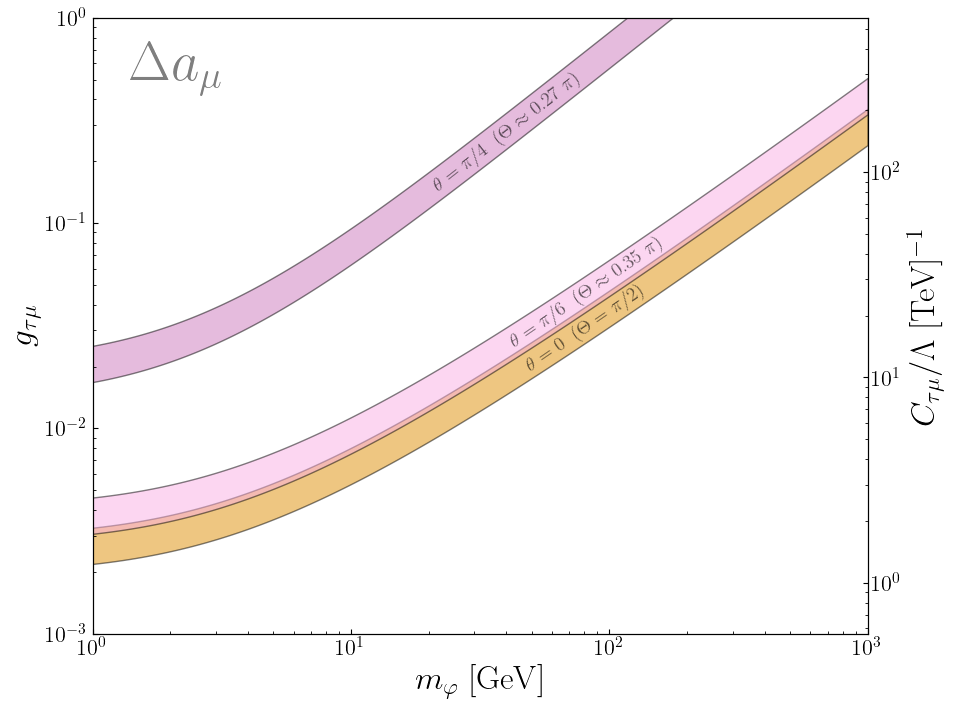

In [13]:

m = np.geomspace(1, 1e3, 1000, dtype = np.complex128)

fig, ax = plt.subplots(figsize = (10, 8))
ALP_ax = ax.twinx()

plot_th = [0, np.pi/6, np.pi/4]

ALP_th = ALP_angles((1, 2), plot_th)
print('\\Theta/\\pi:',[th/np.pi for th in ALP_th])
print('\\Theta/(\\pi/4):', [th/(np.pi/4) for th in ALP_th])

ax.fill_between(m, *g_2_explanation(m, 'mu', (1, 2), th = plot_th[0] * np.ones((3, 3))),
                color = colors[1], edgecolor = 'black', alpha = 0.5)
ax.fill_between(m, *g_2_explanation(m, 'mu', (1, 2), th = plot_th[1] * np.ones((3, 3))),
                color = colors[6], edgecolor = 'black', alpha = 0.5)
ax.fill_between(m, *g_2_explanation(m, 'mu', (1, 2), th = plot_th[2] * np.ones((3, 3))),
                color = colors[4], edgecolor = 'black', alpha = 0.5)

ax.set_xscale('log')
ax.set_xlim(1e0, 1e3)
ax.tick_params(axis = 'x', labelsize = 16)
ax.set_xlabel('$m_{\\varphi}~[{\\rm GeV}]$', fontsize = 24)

ax.set_yscale('log')
ax.set_ylim(1e-3, 1e0)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_ylabel('$g_{\\tau \\mu}$', fontsize = 24)

ax.tick_params(which = 'both', direction = 'in')

ymin, ymax = ax.get_ylim()
Lam = 1000
ALP_factor = Lam/ml[2]
ALP_ax.set_ylim(ALP_factor * ymin, ALP_factor * ymax)
ALP_ax.set_yscale('log')
ALP_ax.tick_params(axis = 'y', labelsize = 16)
ALP_ax.set_ylabel('$C_{\\tau \\mu}/\\Lambda~[{\\rm TeV}]^{-1}$', fontsize = 24)

ax.text(20, 1.43e-1, '$\\theta = \\pi/4~~(\\Theta \\approx 0.27~\\pi)$',
        rotation = 38, fontsize = 14, alpha = 0.6)
ax.text(40, 2.5e-2, '$\\theta = \\pi/6~~(\\Theta \\approx 0.35~\\pi)$',
        rotation = 34.5, fontsize = 14, alpha = 0.6)
ax.text(46, 1.9e-2, '$\\theta = 0~~(\\Theta = \\pi/2)$',
        rotation = 34.5, fontsize = 14, alpha = 0.6)
ax.text(1.4e0, 5e-1, '$\\Delta a_{\\mu}$', fontsize = 40, alpha = 0.5)

ALP_ax.tick_params(which = 'both', direction = 'in')

plt.savefig('figures/chapter3/scalar_ALP_muon_g_2.pdf', format = 'pdf', bbox_inches='tight')